In [23]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")

from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements' / 'steel_disk'

In [24]:
exp_db = tdu.query_exp_db()

In [25]:
exp_id = 26

In [26]:
exp_db[exp_db.exp_id == exp_id]

,exp_id,exp_description,exp_description_short
25,26,steeldisk 01: first full disk,Steel disk 01


In [27]:
meta_data = tdu.fetch_meas_metadata(exp_id=26)
meta_data

,measurement_id,exp_id,date,file_name,material,process_step,vac_mapping,coordinates,meas_cap_status,comments
0,129,26,19.04.2022,20220419_table_ref.txt,table,before_glue,"[1,1000]",coordinate-top.txt,1,reference measurement for full steel plate; re...
1,130,26,20.04.2022,20220420_steeplate_01_ref_vac.txt,steel,before_glue,"[1,60]",coordinate-top.txt,1,reference measurement for full steel plate wit...
2,131,26,20.04.2022,20220420_steeplate_01_ref_novac.txt,steel,before_glue,"[1,1000]",coordinate-top.txt,1,reference measurement for full steel plate wit...
3,132,26,21.04.2022,20220421_steeplate_01_ref_novac.txt,steel,before_glue,"[1,1000]",coordinate-top.txt,1,reference measurement for full steel plate wit...
4,133,26,21.04.2022,20220421_steeplate_01_ref_vac2.txt,steel,before_glue,"[1,60]",coordinate-top.txt,1,reference measurement for full steel plate wit...
5,134,26,21.04.2022,20220421_steeplate_01_curing_bfvacr.txt,steel,after_glue,"[1,60]",coordinate-top.txt,1,first measurement instantly after gluing (vac ...
6,135,26,21.04.2022,20220421_steeplate_01_curing.txt,steel,curing,"[n,1000]",coordinate-top.txt,1,first measurement instantly after gluing (vac ...
7,137,26,02.05.2022,20220502_table_ref.txt,table,experiment,"[1,1000]",coordinate-top.txt,1,ref for measuring plate again after handeling
8,138,26,02.05.2022,20220502_steelplate_01_after_handling.txt,steel,curing,"[1,1000]",coordinate-top.txt,1,ref measurement after handling the plate for a...


## refs previous day - vac & novac 🕳

In [28]:
meas_id_prev_day_novac = 131
meas_id_prev_day_vac = 130

In [29]:
refs_prev_day_pt = tdu.laser_data_analysis(meas_id_prev_day_novac,
                                           meas_id_prev_day_vac,
                                           meta_data, 
                                           folder='steel_disk',
                                            bg_data_check=False, 
                                            sig_data_check=False,
                                            )

20220420_steeplate_01_ref_vac.txt
Reading data...
Reading done
20220420_steeplate_01_ref_novac.txt
Reading data...
Reading done
Background Data:
Signal Data:


(before_glue, vac off)


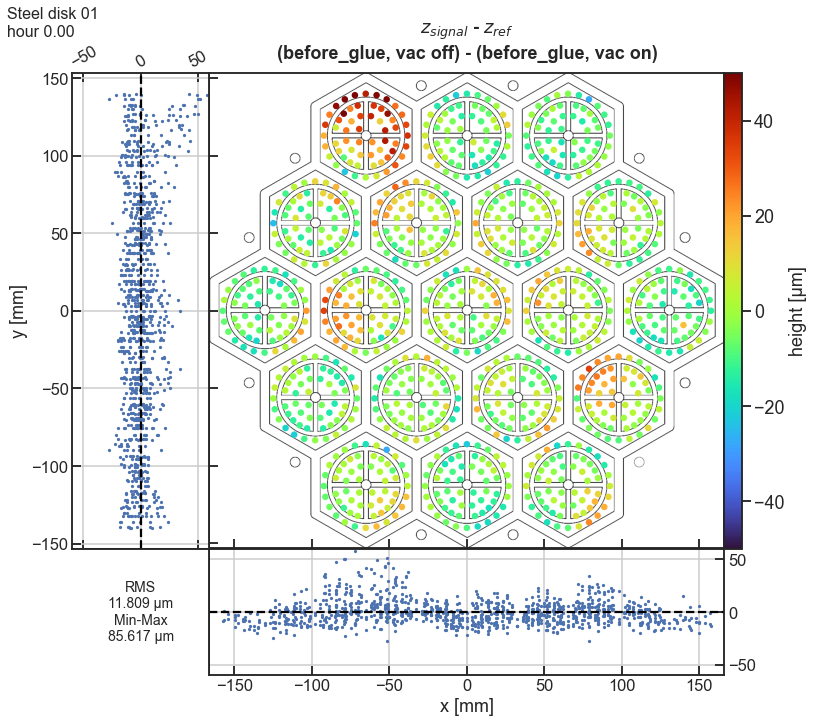

In [30]:
tdp.plot_analysis_results(exp_id, #*exp id
                          refs_prev_day_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df
                          meas_id_sig= meas_id_prev_day_novac,
                          meas_id_bg = meas_id_prev_day_vac,
                          joyplot=False,hexagon_flatness=True, R_vs_t=False, triplet=False)

(before_glue, vac off)


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'$z_{signal}$ - $z_{ref}$\n(before_glue, vac off) - (before_glue, vac on)'}, xlabel='z [µm]', ylabel='Count'>)

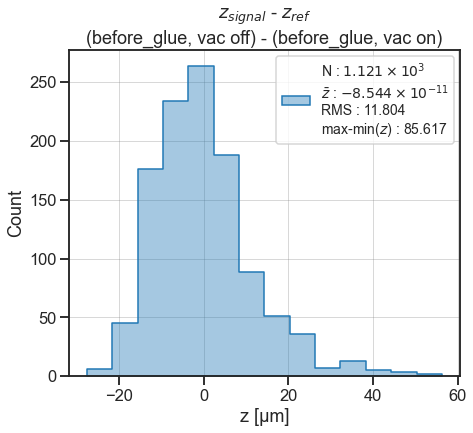

In [31]:
data = refs_prev_day_pt['run_nr_1']
tdp.plot_z_table_hist(data,
                  meta_data,
                  meas_id_sig=meas_id_prev_day_novac, 
                  meas_id_bg=meas_id_prev_day_vac, )

## ref novac & vac same day

In [32]:
meas_id_ref_novac = 132
meas_id_ref_vac = 133

In [33]:
refs_same_day_pt = tdu.laser_data_analysis(meas_id_ref_novac,
                                           meas_id_ref_vac,
                                           meta_data, 
                                           folder='steel_disk',
                                            bg_data_check=False, 
                                            sig_data_check=False,
                                            )

20220421_steeplate_01_ref_vac2.txt
Reading data...
Reading done
20220421_steeplate_01_ref_novac.txt
Reading data...
Reading done
Background Data:
Signal Data:


(before_glue, vac off)


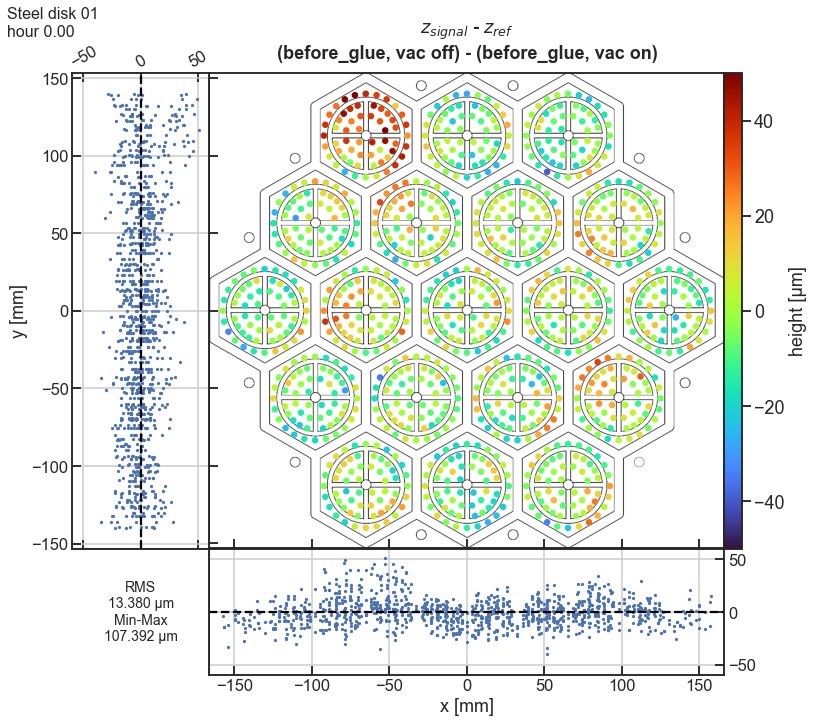

In [34]:
tdp.plot_analysis_results(exp_id, #*exp id
                          refs_same_day_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df                          
                          meas_id_sig= meas_id_ref_novac,
                          meas_id_bg = meas_id_ref_vac,
                          joyplot=False,hexagon_flatness=True, R_vs_t=False, triplet=False)

(before_glue, vac off)


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'$z_{signal}$ - $z_{ref}$\n(before_glue, vac off) - (before_glue, vac on)'}, xlabel='z [µm]', ylabel='Count'>)

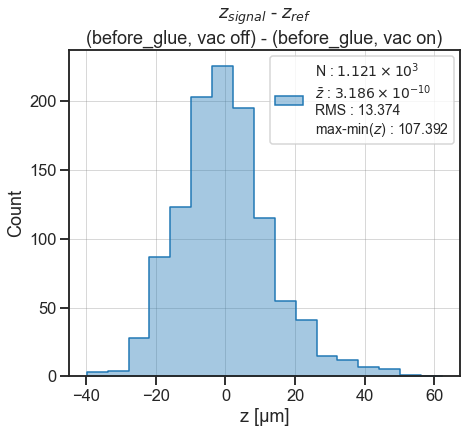

In [35]:
data = refs_same_day_pt['run_nr_1']
tdp.plot_z_table_hist(data,
                  meta_data,
                  meas_id_sig=meas_id_prev_day_novac, 
                  meas_id_bg=meas_id_prev_day_vac, )

# before glue vs after glue

In [36]:
meas_id_ref_novac = 132
meas_id_ref_vac = 133
meas_id_curing_before_release = 134

In [37]:
before_glue_after_glue_pt = tdu.laser_data_analysis(meas_id_curing_before_release,
                                           meas_id_ref_vac,
                                           meta_data, 
                                           folder='steel_disk',
                                            bg_data_check=False, 
                                            sig_data_check=False,
                                            )

20220421_steeplate_01_ref_vac2.txt
Reading data...
Reading done
20220421_steeplate_01_curing_bfvacr.txt
Reading data...
Reading done
Background Data:
Signal Data:


(after_glue, vac on)


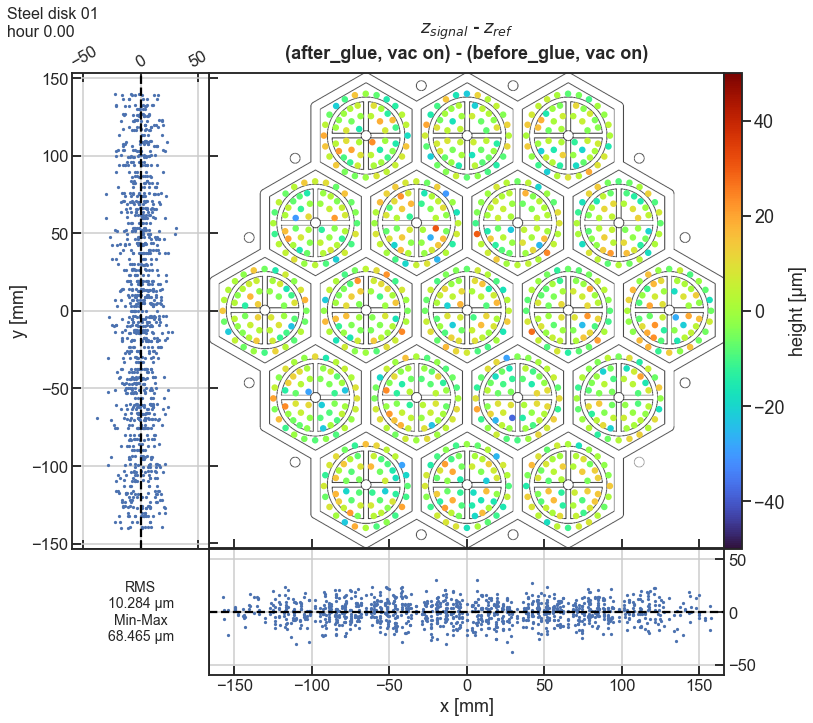

In [38]:
tdp.plot_analysis_results(exp_id, #*exp id
                          before_glue_after_glue_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df                          
                          meas_id_sig= meas_id_curing_before_release,
                          meas_id_bg = meas_id_ref_vac,
                          joyplot=False,hexagon_flatness=True, R_vs_t=False, triplet=False)

(after_glue, vac on)


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'$z_{signal}$ - $z_{ref}$\n(after_glue, vac on) - (before_glue, vac on)'}, xlabel='z [µm]', ylabel='Count'>)

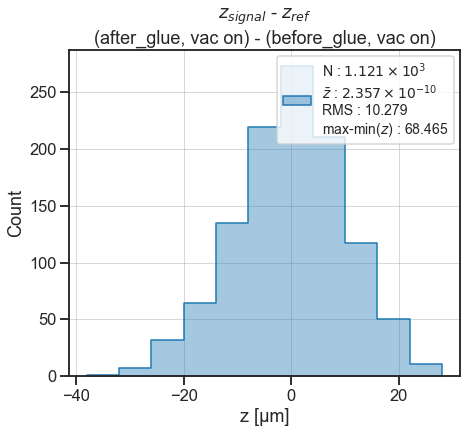

In [41]:
data = before_glue_after_glue_pt['run_nr_1']
tdp.plot_z_table_hist(data,
                  meta_data,
                  meas_id_sig=meas_id_curing_before_release, 
                  meas_id_bg=meas_id_prev_day_vac, )

# curing with vac ref

In [42]:
meas_id_curing = 135

In [45]:
curing_vac_pt = tdu.laser_data_analysis(meas_id_curing,
                                           meas_id_ref_vac,
                                           meta_data, 
                                           folder='steel_disk',
                                            bg_data_check=False, 
                                            sig_data_check=False,
                                            )

20220421_steeplate_01_ref_vac2.txt
Reading data...
Reading done
20220421_steeplate_01_curing.txt
Reading data...
Reading done
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Back

(curing, vac off)


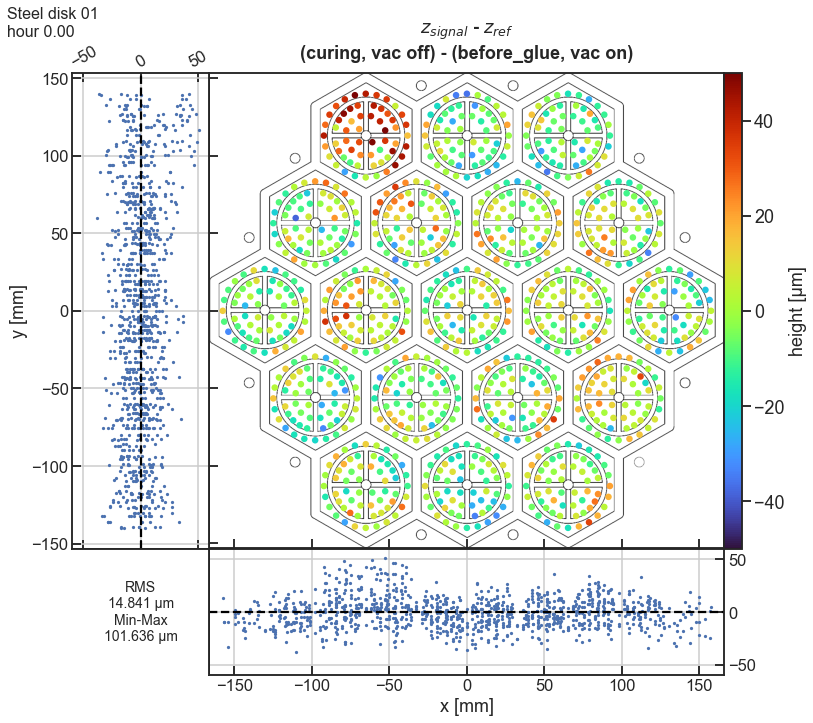

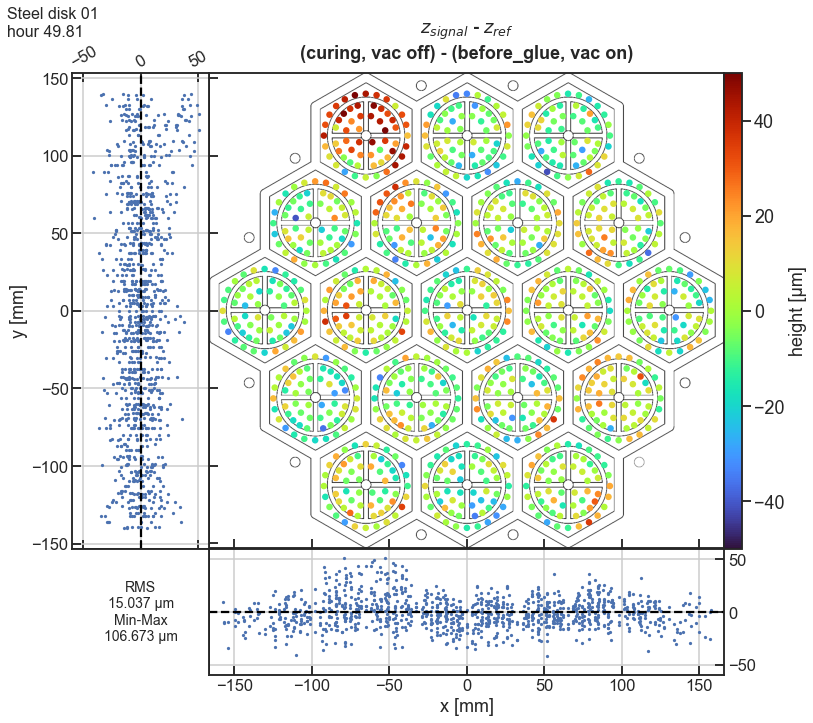

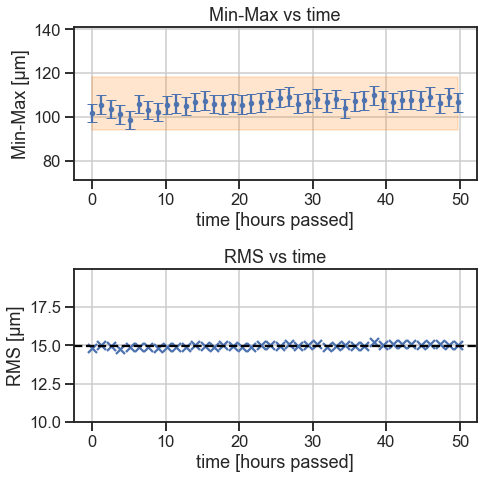

In [48]:
tdp.plot_analysis_results(exp_id, #*exp id
                          curing_vac_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df                          
                          meas_id_sig= meas_id_curing,
                          meas_id_bg = meas_id_ref_vac,
                          joyplot=False,hexagon_flatness=True, R_vs_t=True, triplet=False,
                          plot_runs=[1,len(curing_vac_pt.keys())])

(after_glue, vac on)


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'$z_{signal}$ - $z_{ref}$\n(after_glue, vac on) - (before_glue, vac on)'}, xlabel='z [µm]', ylabel='Count'>)

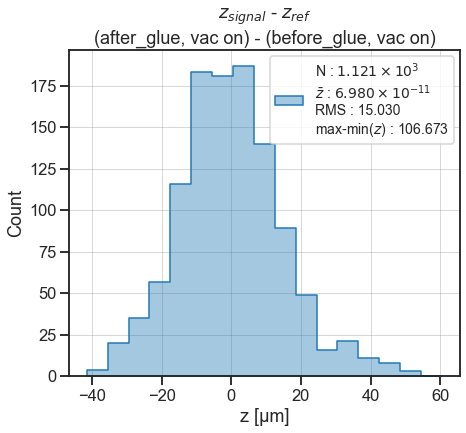

In [50]:
data = curing_vac_pt[f'run_nr_{len(curing_vac_pt.keys())}']
tdp.plot_z_table_hist(data,
                  meta_data,
                  meas_id_sig=meas_id_curing_before_release, 
                  meas_id_bg=meas_id_prev_day_vac, )

# curing with novac ref

In [51]:
curing_novac_pt = tdu.laser_data_analysis(meas_id_curing,
                                           meas_id_ref_novac,
                                           meta_data, 
                                           folder='steel_disk',
                                            bg_data_check=False, 
                                            sig_data_check=False,
                                            )

20220421_steeplate_01_ref_novac.txt
Reading data...
Reading done
20220421_steeplate_01_curing.txt
Reading data...
Reading done
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Background Data:
Signal Data:
Bac

(curing, vac off)


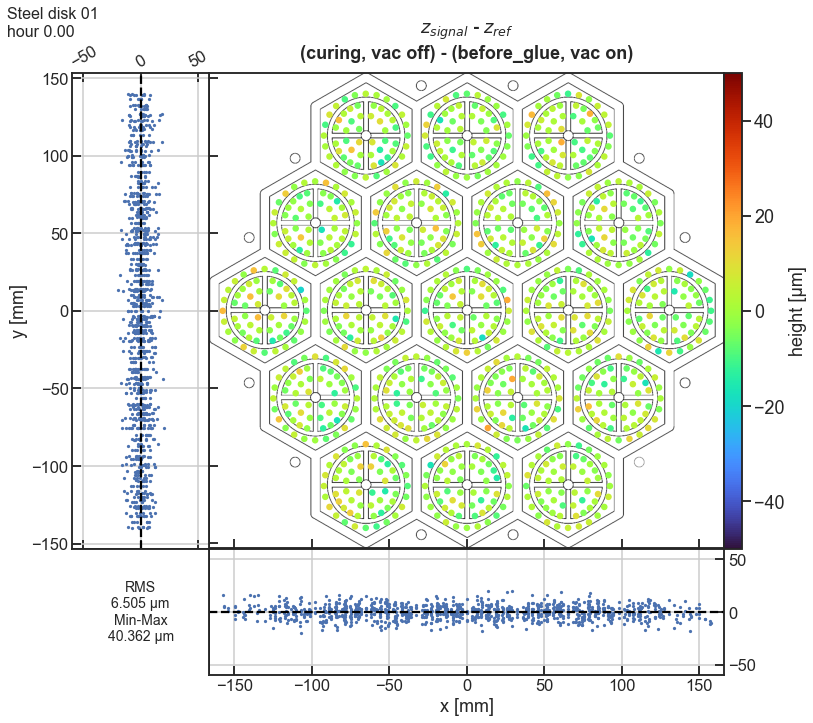

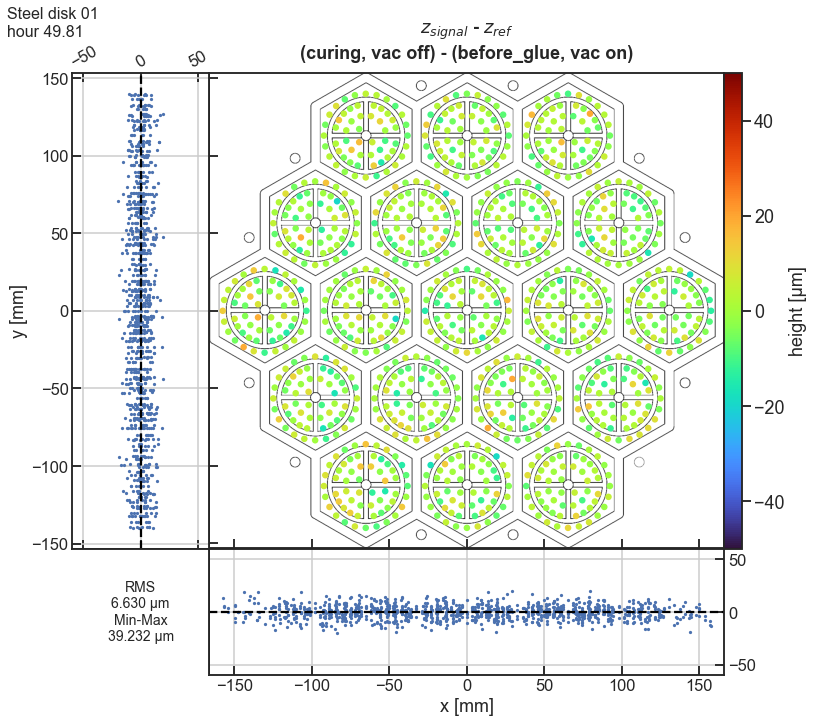

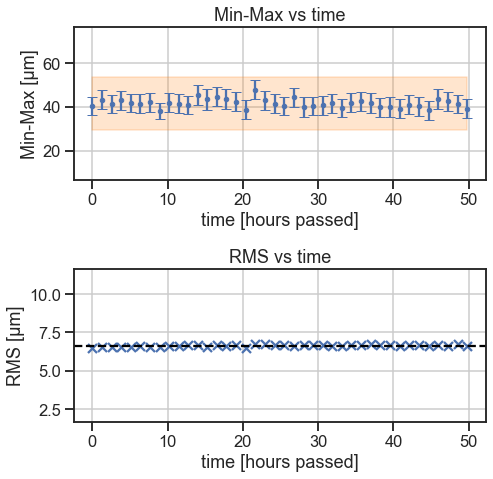

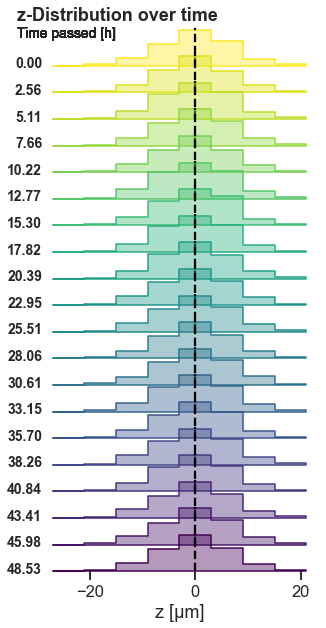

In [54]:
tdp.plot_analysis_results(exp_id, #*exp id
                          curing_novac_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df                          
                          meas_id_sig= meas_id_curing,
                          meas_id_bg = meas_id_ref_vac,
                          joyplot=True,hexagon_flatness=True, R_vs_t=True, triplet=False,
                          plot_runs=[1,len(curing_vac_pt.keys())])

40
(curing, vac off)


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'$z_{signal}$ - $z_{ref}$\n(curing, vac off) - (before_glue, vac on)'}, xlabel='z [µm]', ylabel='Count'>)

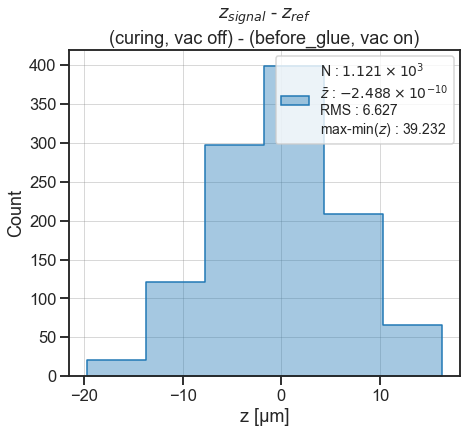

In [57]:
print(len(curing_vac_pt.keys()))
data = curing_novac_pt[f'run_nr_{len(curing_vac_pt.keys())}']
tdp.plot_z_table_hist(data,
                  meta_data,
                  meas_id_sig=meas_id_curing, 
                  meas_id_bg=meas_id_ref_vac, )
